# **Internship Task – TechHorizon**

**Student / Intern: Ameer Hamza**

**Email: hiameerhamza@gmail.com**

**Task 2:** Image Classification Using Pre-trained Models

For this task, we use two popular pre-trained deep learning models—MobileNetV2 and ResNet50—to classify images from a dataset stored on Google Drive. Both models are trained on ImageNet, which allows them to recognize a wide variety of objects. The goal is to classify general objects in images.

# **Step 1: Mount Google Drive and Set Dataset Path**

The dataset is stored in Google Drive, so we mount it to access the images:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/Datasets/TechHorizonTask2Dataset"


# **Step 2: Load Pre-trained Models**

We use two pre-trained models:



1.   MobileNetV2 (lightweight, efficient)
2.   ResNet50 (deeper network, generally higher accuracy)

In [4]:
from tensorflow.keras.applications import MobileNetV2, ResNet50

model1 = MobileNetV2(weights="imagenet")
model2 = ResNet50(weights="imagenet")


Both bove models are trained on ImageNet, so we don’t need to train them from scratch.

# **Step 3: Image Preprocessing**

Each model requires images of size 224×224 pixels and preprocessed differently.
*   **load_img** resizes the image.
*   **img_to_array** converts it to a NumPy array.
*   **np.expand_dims** adds a batch dimension required by Keras models.









In [5]:
from tensorflow.keras.preprocessing import image

def load_and_prep_img(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array


# **Step 4: Load Image Files**

We collect all image paths from the dataset folder. This allows us to iterate through images for prediction.

In [6]:
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


# **Step 5: Predictions Using Both Models**

We predict the top 3 classes for the first 10 images using both models.
*   MobileNetV2 uses preprocess_mnv2 for preprocessing.
*   ResNet50 uses preprocess_resnet.
*   decode_predictions converts numerical predictions into human-readable class labels with probabilities.

In [7]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mnv2, decode_predictions as decode_mnv2
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet, decode_predictions as decode_resnet

for i, img_path in enumerate(image_files[:10]):
    img, img_array = load_and_prep_img(img_path)

    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]

    preds2 = model2.predict(preprocess_resnet(img_array))
    decoded2 = decode_resnet(preds2, top=3)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


# **Step 6: Display Predictions**

We visualize the first 10 images along with predictions from both models.

*   Each image is shown twice, once for each model.
*   Top 3 predicted classes with confidence percentages are displayed.
*   This allows a side-by-side comparison of both models’ performance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


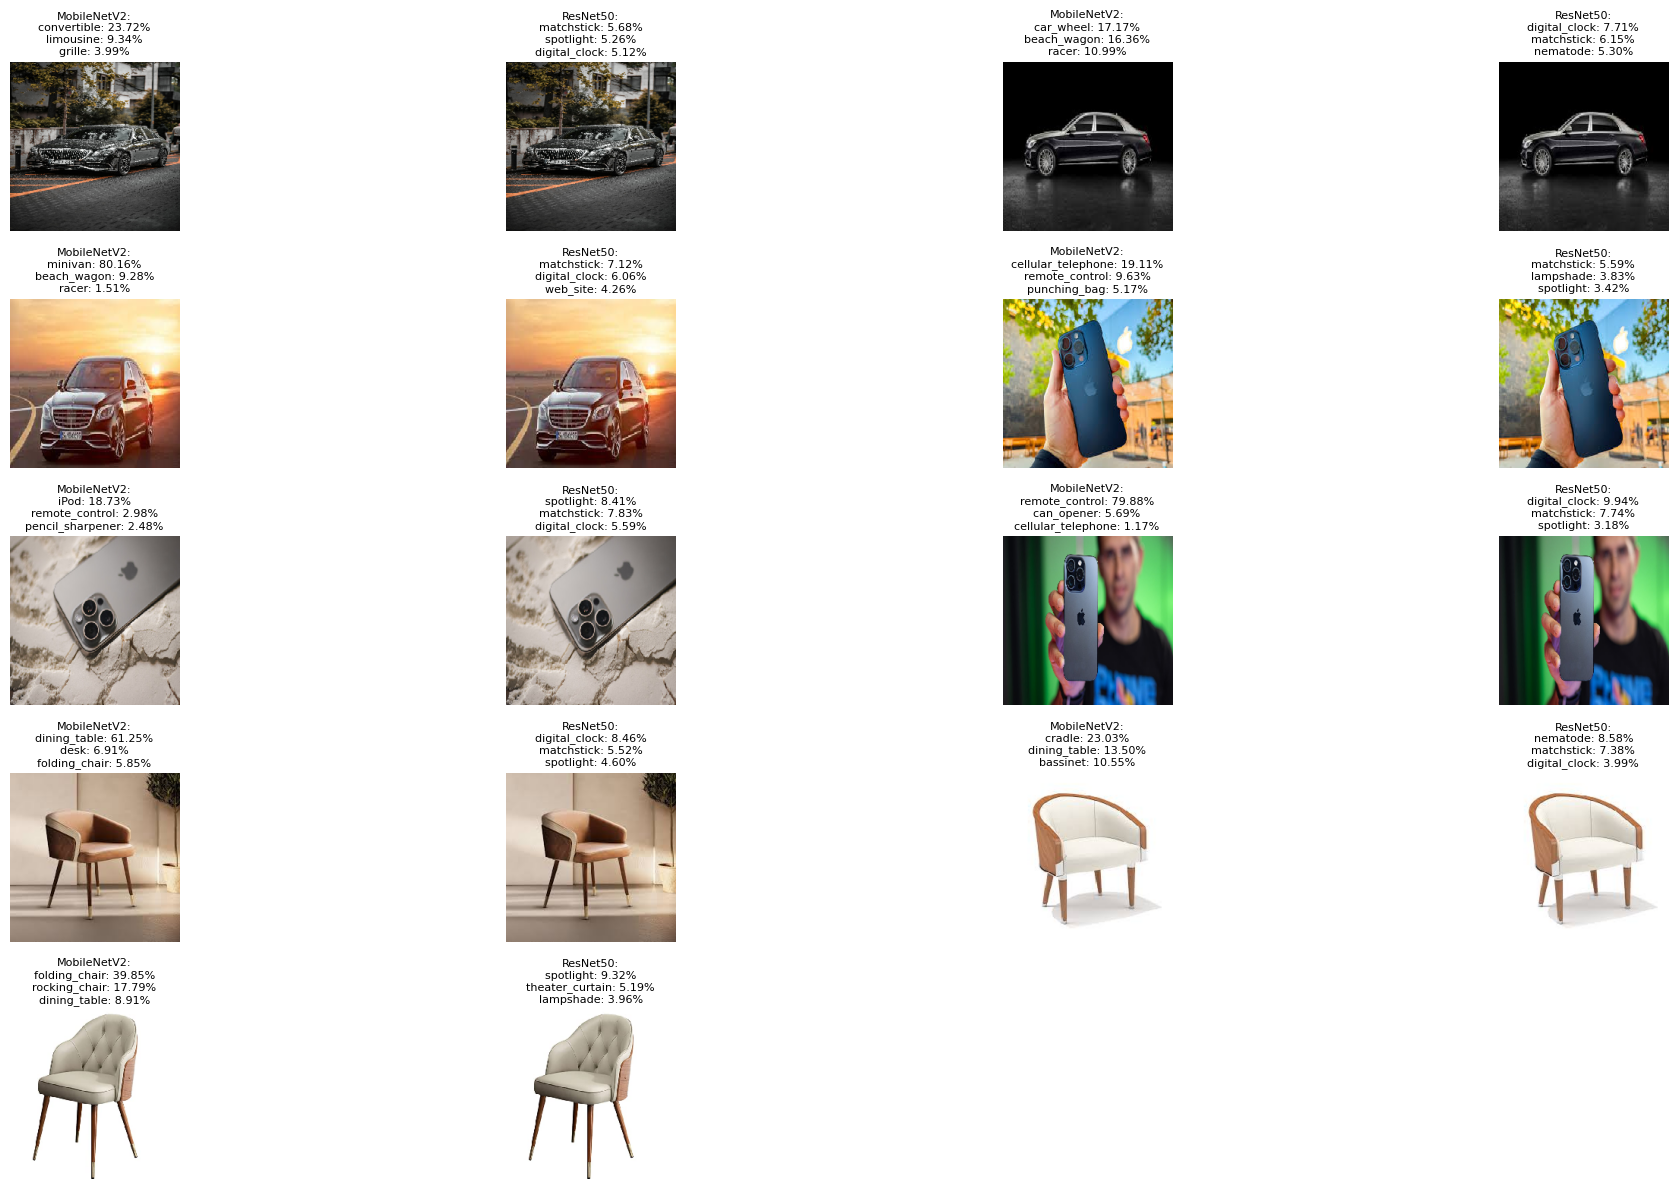

In [3]:
plt.figure(figsize=(20, 12))
for i, img_path in enumerate(image_files[:10]):
    # Load and preprocess image
    img, img_array = load_and_prep_img(img_path)

    # Predict with both models
    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]

    preds2 = model2.predict(preprocess_resnet(img_array))
    decoded2 = decode_resnet(preds2, top=3)[0]

    # Display MobileNetV2 prediction
    plt.subplot(5, 4, 2*i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("MobileNetV2:\n" + "\n".join([f"{label}: {prob:.2%}" for (_, label, prob) in decoded1]), fontsize=8)

    # Display ResNet50 prediction
    plt.subplot(5, 4, 2*i+2)
    plt.imshow(img)
    plt.axis("off")
    plt.title("ResNet50:\n" + "\n".join([f"{label}: {prob:.2%}" for (_, label, prob) in decoded2]), fontsize=8)

plt.tight_layout()
plt.show()
